# Hyperparameter Tuning 

In [1]:
#Import notwendiger libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import math

import os 
import warnings
warnings.filterwarnings('ignore')

#Import des Panel-Datensatzes 
data_lgd = pd.read_csv('LGD_Panel.csv')

In [2]:
#Bestimmung von Datentypen 
print(data_lgd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62178 entries, 0 to 62177
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       62178 non-null  int64  
 1   time                     62178 non-null  int64  
 2   orig_time                62178 non-null  int64  
 3   first_time               62178 non-null  int64  
 4   mat_time                 62178 non-null  int64  
 5   res_time                 1160 non-null   float64
 6   balance_time             62178 non-null  float64
 7   LTV_time                 62153 non-null  float64
 8   interest_rate_time       62178 non-null  float64
 9   rate_time                62178 non-null  float64
 10  hpi_time                 62178 non-null  float64
 11  gdp_time                 62178 non-null  float64
 12  uer_time                 62178 non-null  float64
 13  REtype_CO_orig_time      62178 non-null  int64  
 14  REtype_PU_orig_time   

In [3]:
#Darstellen der Features mit NaN in Trainings- und Testset  
print('columns with null values:\n', data_lgd.isnull().sum())
print('-'*33)

columns with null values:
 id                             0
time                           0
orig_time                      0
first_time                     0
mat_time                       0
res_time                   61018
balance_time                   0
LTV_time                      25
interest_rate_time             0
rate_time                      0
hpi_time                       0
gdp_time                       0
uer_time                       0
REtype_CO_orig_time            0
REtype_PU_orig_time            0
REtype_SF_orig_time            0
investor_orig_time             0
balance_orig_time              0
FICO_orig_time                 0
LTV_orig_time                  0
Interest_Rate_orig_time        0
state_orig_time              350
hpi_orig_time                  0
default_time                   0
payoff_time                    0
status_time                    0
lgd_time                   60653
recovery_res               60653
dtype: int64
---------------------------------


In [4]:
#Überblick über wichtige Kennzahlen des Trainings- und Testsets
data_lgd.describe()

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,...,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res
count,62178.000000,62178.000000,62178.000000,62178.000000,62178.000000,1160.000000,6.217800e+04,62153.000000,62178.000000,62178.000000,...,6.217800e+04,62178.000000,62178.000000,62178.000000,62178.000000,62178.000000,62178.000000,62178.000000,1525.000000,1.525000e+03
mean,25371.293528,35.877979,20.688218,24.649185,137.722651,40.711207,2.448294e+05,83.320156,6.663767,4.516695,...,2.545839e+05,673.357200,78.702839,5.600969,198.501593,0.024526,0.042218,0.108961,0.495982,1.324083e+05
std,13737.375198,11.652381,7.377185,6.838495,19.016813,9.276421,2.089384e+05,28.106665,2.100772,0.513379,...,2.115463e+05,72.100064,10.243045,2.985547,33.758503,0.154678,0.201087,0.426060,0.381771,1.501463e+05
min,4.000000,1.000000,-40.000000,1.000000,18.000000,7.000000,0.000000e+00,0.000000,0.000000,1.650000,...,0.000000e+00,429.000000,50.100000,0.000000,75.730000,0.000000,0.000000,0.000000,0.000000,-1.909486e+05
25%,13711.250000,28.000000,18.000000,21.000000,137.000000,35.000000,1.008911e+05,67.056456,5.625000,4.240000,...,1.075000e+05,628.000000,75.000000,4.875000,186.910000,0.000000,0.000000,0.000000,0.104600,3.644842e+04
50%,25572.000000,34.000000,22.000000,25.000000,142.000000,40.000000,1.809344e+05,82.256173,6.625000,4.600000,...,1.880000e+05,675.000000,80.000000,6.250000,216.770000,0.000000,0.000000,0.000000,0.514654,8.948393e+04
75%,37326.000000,44.000000,25.000000,28.000000,145.000000,47.000000,3.337000e+05,100.766023,7.820000,4.710000,...,3.500000e+05,730.000000,80.000000,7.388000,223.750000,0.000000,0.000000,0.000000,0.768253,1.832579e+05
max,49972.000000,60.000000,60.000000,60.000000,229.000000,60.000000,3.106990e+06,803.513550,37.500000,8.650000,...,3.107000e+06,819.000000,119.800000,15.000000,226.290000,1.000000,1.000000,2.000000,2.022767,1.518109e+06


In [5]:
#Beschränken des Datensets auf Schuldner, deren Kredit ausgefallen ist
data_lgd = data_lgd[data_lgd['default_time'] == 1]
data_lgd_new = data_lgd.dropna(subset = ['res_time'])
data_lgd_new.head()

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,...,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res
263,191,31,23,26,143,38.0,223884.74,87.176730,7.360,4.39,...,630,80.0,7.360,FL,221.91,1,0,1,0.883919,25988.76
356,330,33,27,28,147,43.0,144374.85,98.272701,9.045,4.71,...,613,80.0,9.045,FL,222.39,1,0,1,1.236213,-34103.22
360,331,31,26,28,147,60.0,285484.83,89.452618,10.620,4.64,...,605,80.0,10.620,FL,225.10,1,0,1,0.706870,83684.11
372,343,42,27,32,148,44.0,79140.44,121.463371,8.870,4.71,...,633,90.0,8.870,MD,222.39,1,0,1,1.077359,-6122.26
420,385,39,28,32,88,41.0,150074.42,122.611681,9.820,4.65,...,584,95.0,9.820,TX,219.67,1,0,1,0.351805,97277.45


In [6]:
#Anzahl der null values nach erster Beschränkung des Datensets
print(data_lgd_new.isnull().sum())
print('-'*33)
print(data_lgd_new.shape)

id                         0
time                       0
orig_time                  0
first_time                 0
mat_time                   0
res_time                   0
balance_time               0
LTV_time                   0
interest_rate_time         0
rate_time                  0
hpi_time                   0
gdp_time                   0
uer_time                   0
REtype_CO_orig_time        0
REtype_PU_orig_time        0
REtype_SF_orig_time        0
investor_orig_time         0
balance_orig_time          0
FICO_orig_time             0
LTV_orig_time              0
Interest_Rate_orig_time    0
state_orig_time            5
hpi_orig_time              0
default_time               0
payoff_time                0
status_time                0
lgd_time                   0
recovery_res               0
dtype: int64
---------------------------------
(1160, 28)


In [7]:
#Entfernen der NaN in 'state_orig_time'
data_lgd_new = data_lgd_new.dropna(subset = ['state_orig_time'])

print(data_lgd_new.isnull().sum())
print(data_lgd_new.shape)

id                         0
time                       0
orig_time                  0
first_time                 0
mat_time                   0
res_time                   0
balance_time               0
LTV_time                   0
interest_rate_time         0
rate_time                  0
hpi_time                   0
gdp_time                   0
uer_time                   0
REtype_CO_orig_time        0
REtype_PU_orig_time        0
REtype_SF_orig_time        0
investor_orig_time         0
balance_orig_time          0
FICO_orig_time             0
LTV_orig_time              0
Interest_Rate_orig_time    0
state_orig_time            0
hpi_orig_time              0
default_time               0
payoff_time                0
status_time                0
lgd_time                   0
recovery_res               0
dtype: int64
(1155, 28)


In [8]:
#Entwickeln neuer Features
data_lgd_new.loc[:, "res_duration"] = data_lgd_new.loc[:, "res_time"] - data_lgd_new.loc[:, 'time']
data_lgd_new.loc[:, "planned_lifetime"] = data_lgd_new.loc[:, "mat_time"] - data_lgd_new.loc[:, "orig_time"]
data_lgd_new.loc[:, "realized_lifetime"] = data_lgd_new.loc[:, "time"] - data_lgd_new.loc[:, "orig_time"]
data_lgd_new.loc[:, "rel_realized_lifetime"] = data_lgd_new.loc[:, "realized_lifetime"] / data_lgd_new.loc[:, "planned_lifetime"]
data_lgd_new.loc[:, "remaining_lifetime"] = data_lgd_new.loc[:, "planned_lifetime"] - data_lgd_new.loc[:, "realized_lifetime"]
data_lgd_new.loc[:, "diff_LTV"] = data_lgd_new.loc[:, "LTV_time"] - data_lgd_new.loc[:, "LTV_orig_time"]
data_lgd_new.loc[:, "rel_diff_LTV"] = data_lgd_new.loc[:, "LTV_time"] / data_lgd_new.loc[:, "LTV_orig_time"]
data_lgd_new.loc[:, "diff_hpi"] = data_lgd_new.loc[:, "hpi_time"] - data_lgd_new.loc[:, "hpi_orig_time"]
data_lgd_new.loc[:, "rel_diff_hpi"] = data_lgd_new.loc[:, "hpi_time"] / data_lgd_new.loc[:, "hpi_orig_time"]
data_lgd_new.loc[:, "diff_interest_rate"] = data_lgd_new.loc[:, "interest_rate_time"] - data_lgd_new.loc[:, "Interest_Rate_orig_time"]
data_lgd_new.loc[:, "rel_diff_interest_rate"] = data_lgd_new.loc[:, "interest_rate_time"] / data_lgd_new.loc[:, "Interest_Rate_orig_time"]


In [9]:
state_dummies = pd.get_dummies(data_lgd_new['state_orig_time'])
data_lgd_new = pd.concat([data_lgd_new, state_dummies], axis = 1)

In [10]:
defaults_state = data_lgd_new['state_orig_time'].value_counts()
print(defaults_state)

CA    281
FL    158
AZ     54
TX     52
NV     50
GA     49
MI     41
IL     39
OH     37
WA     30
VA     27
MD     26
MN     25
MO     23
CO     23
NY     19
NC     17
IN     16
MA     16
TN     16
OR     16
NJ     16
SC     11
LA     10
AL      9
PA      9
UT      8
CT      8
OK      7
ME      7
WI      6
MS      6
IA      5
HI      4
KY      4
KS      3
ID      3
DC      3
DE      3
NH      3
NM      3
NE      2
WV      2
AR      2
PR      1
WY      1
MT      1
AK      1
RI      1
SD      1
Name: state_orig_time, dtype: int64


In [11]:
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['AK']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['RI']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['PR']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['MT']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['WY']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['SD']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['AR']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['WV']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['NE']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['KS']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['ID']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['NH']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['DC']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['DE']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['NM']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['HI']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['KY']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['IA']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['WI']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['MS']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['OK']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['ME']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['UT']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['CT']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['AL']==1].index, inplace=True)
data_lgd_new.drop(data_lgd_new.loc[data_lgd_new['PA']==1].index, inplace=True)

In [12]:
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'AK']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'RI']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'PR']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'WY']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'MT']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'SD']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'WV']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'NE']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'AR']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'NM']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'KS']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'ID']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'DE']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'DC']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'NH']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'KY']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'HI']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'IA']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'MS']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'WI']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'OK']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'ME']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'CT']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'UT']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'PA']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'AL']


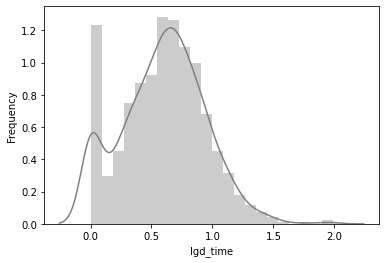

In [13]:
sns.distplot(data_lgd_new.lgd_time, color='grey')
plt.ylabel('Frequency')
plt.show()

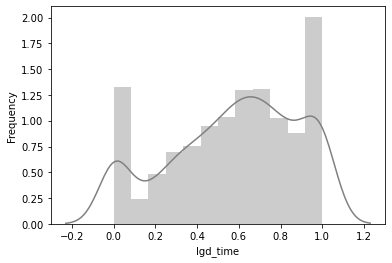

count    1052.00
mean        0.58
std         0.31
min         0.00
25%         0.37
50%         0.61
75%         0.83
max         1.00
Name: lgd_time, dtype: float64

In [14]:
#Winsorizen der lgd_time um realisationen zwischen 1 und 0 zu erhalten
data_lgd_new.loc[data_lgd_new['lgd_time'] >= 1, 'lgd_time'] = 1
data_lgd_new.loc[data_lgd_new['lgd_time'] <= 0, 'lgd_time'] = 0.0001



sns.distplot(data_lgd_new.lgd_time, color='grey')
plt.ylabel('Frequency')
plt.show()



data_lgd_new.lgd_time.describe().round(decimals = 2)

In [15]:
#Korrelation der Features mit lgd_time
print('-'*35)
print(data_lgd_new.corr()['lgd_time'])

-----------------------------------
id            0.081621
time          0.155928
orig_time     0.290538
first_time    0.293904
mat_time      0.126688
                ...   
SC            0.022774
TN           -0.064134
TX           -0.069851
VA           -0.081850
WA           -0.132797
Name: lgd_time, Length: 62, dtype: float64


In [16]:
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'id']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'rate_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'hpi_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'uer_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'REtype_CO_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'REtype_PU_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'REtype_SF_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'FICO_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'LTV_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'default_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'payoff_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'status_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'planned_lifetime']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'sq_planned_lifetime']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'realized_lifetime']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'rel_realized_lifetime']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'sq_realized_lifetime']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'remaining_lifetime']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'sq_remaining_lifetime']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'sq_diff_LTV']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'sq_LTV_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'sq_balance_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'sq_FICO_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'state_orig_time']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'diff_interest_rate']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'rel_diff_interest_rate']
data_lgd_new = data_lgd_new.loc[:, data_lgd_new.columns != 'recovery_res']

In [17]:
data_lgd_new.describe()

,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,gdp_time,investor_orig_time,...,NJ,NV,NY,OH,OR,SC,TN,TX,VA,WA
count,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1.052000e+03,1052.000000,1052.000000,1052.000000,1052.000000,...,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000
mean,34.251901,22.836502,25.713878,142.649240,40.890684,2.494759e+05,97.105967,7.678277,0.459465,0.150190,...,0.015209,0.047529,0.018061,0.035171,0.015209,0.010456,0.015209,0.049430,0.025665,0.028517
std,7.887666,6.041395,5.106932,13.492838,9.143347,1.683180e+05,20.825714,1.946618,2.316799,0.357428,...,0.122442,0.212868,0.133235,0.184300,0.122442,0.101768,0.122442,0.216866,0.158210,0.166524
min,3.000000,-21.000000,1.000000,40.000000,9.000000,1.256519e+04,19.565958,2.000000,-4.146711,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,22.000000,24.000000,141.000000,35.000000,1.237250e+05,83.234567,6.625000,-0.314448,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,25.000000,27.000000,144.000000,40.000000,2.086250e+05,98.555285,7.625000,1.229172,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,26.000000,29.000000,147.000000,47.000000,3.311616e+05,112.317430,8.875000,2.151365,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58.000000,31.000000,52.000000,189.000000,60.000000,1.317836e+06,149.612373,13.500000,4.320114,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
#Splitten in Trainings- und Testset
lgd_train = data_lgd_new[data_lgd_new['time'] < 45]
lgd_test = data_lgd_new[data_lgd_new['time'] >= 45]

In [19]:

data_less_time_train = lgd_train.loc[:, lgd_train.columns != 'time']
data_less_time_test = lgd_test.loc[:, lgd_test.columns != 'time']

y_train = data_less_time_train['lgd_time']
x_train = data_less_time_train.loc[:, data_less_time_train.columns != 'lgd_time']

y_test = data_less_time_test['lgd_time']
x_test = data_less_time_test.loc[:, data_less_time_test.columns != 'lgd_time']

In [20]:
#Importieren des StandardScalers
from sklearn.preprocessing import StandardScaler

#Standardisieren der features
scaler = StandardScaler()

#Nur das Trainingsset fitten
scaler.fit(x_train)

#Transformieren von Trainings- und Testset
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:
from sklearn.decomposition import PCA 
#Ausgeben der principle components, sodass 90% der varianz erhalten bleiben 
pca = PCA(.90)

Anzahl benötigter principal Komponents
----------------------------------------
27


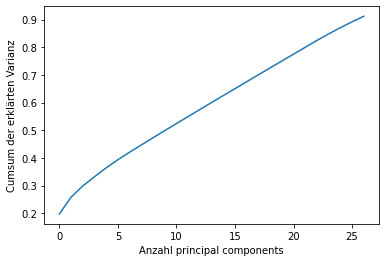

In [22]:
#Fit der PCA auf das Trainingsset
pca.fit(x_train_scaled)

#Plot der kumulativen Summe der erklärten Varianz
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Anzahl principal components')
plt.ylabel('Cumsum der erklärten Varianz')

#Anzahl benötigter Komponenten
print('Anzahl benötigter principal Komponents')
print('-'*40)
print(pca.n_components_)

In [23]:
#Transformieren von Trainings- und Testset
x_train_pca = pca.transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [24]:
#Schaffen der neuen Datensätze 
PCA_train = pd.DataFrame(data=x_train_pca, columns=['principle_component1','principle_component2','principle_component3','principle_component4','principle_component5','principle_component6','principle_component7','principle_component8','principle_component9','principle_component10','principle_component11','principle_component12','principle_component13','principle_component14','principle_component15','principle_component16','principle_component17','principle_component18','principle_component19','principle_component20','principle_component21','principle_component22','principle_component23','principle_component24','principle_component25','principle_component26','principle_component27'])
PCA_test = pd.DataFrame(data=x_test_pca, columns=['principle_component1','principle_component2','principle_component3','principle_component4','principle_component5','principle_component6','principle_component7','principle_component8','principle_component9','principle_component10','principle_component11','principle_component12','principle_component13','principle_component14','principle_component15','principle_component16','principle_component17','principle_component18','principle_component19','principle_component20','principle_component21','principle_component22','principle_component23','principle_component24','principle_component25','principle_component26','principle_component27'])

In [25]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint 
rf = RandomForestRegressor(random_state = 42)

pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [26]:
from sklearn.tree import DecisionTreeRegressor 
dt = DecisionTreeRegressor()
pprint('Parameters currently in use:\n')
pprint(dt.get_params())

'Parameters currently in use:\n'
{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}


In [27]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
pprint('Parameters currently in use:\n')
pprint(gbr.get_params())


'Parameters currently in use:\n'
{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [28]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import pickle

In [29]:
params_dt = {'max_depth': randint(1, 150),
            'max_features': randint (1, 20),
            'min_samples_split': randint(1, 100),
            'min_samples_leaf': randint(1, 100),
            'min_impurity_decrease' : [0.1, 0.01, 0.001, 0.0001, 0.00001]}

dtr = DecisionTreeRegressor()
rand_search_cv_dt = RandomizedSearchCV(dtr, params_dt, verbose = 1, n_iter = 50, n_jobs = 2, cv=5)

In [30]:
#Hyperparameter for Decision Tree with PCA data
rs_dt_pca = rand_search_cv_dt.fit(x_train_pca, y_train)
dt_pca_params = rs_dt_pca.best_params_
print('Hyperparameters for Decision Tree with PCA data:\n', dt_pca_params)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Hyperparameters for Decision Tree with PCA data:
 {'max_depth': 99, 'max_features': 15, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 23, 'min_samples_split': 89}


[Parallel(n_jobs=2)]: Done 218 tasks      | elapsed:    5.0s
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed:    5.1s finished


In [31]:
#Hyperparameter for Decision Tree with scaled data
rs_dt_scaled = rand_search_cv_dt.fit(x_train_scaled, y_train)
dt_scaled_params = rs_dt_scaled.best_params_
print('Hyperparameters for Decision Tree with scaled data:\n', dt_scaled_params)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Hyperparameters for Decision Tree with scaled data:
 {'max_depth': 87, 'max_features': 12, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 4, 'min_samples_split': 67}


[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed:    0.6s finished


In [32]:
#Hyperparameter for Decision Tree with base data
rs_dt_base = rand_search_cv_dt.fit(x_train, y_train)
dt_base_params = rs_dt_base.best_params_
print('Hyperparameters for Decision Tree with base data:\n', dt_base_params)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Hyperparameters for Decision Tree with base data:
 {'max_depth': 127, 'max_features': 14, 'min_impurity_decrease': 1e-05, 'min_samples_leaf': 26, 'min_samples_split': 78}


[Parallel(n_jobs=2)]: Done 240 tasks      | elapsed:    2.0s
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed:    2.1s finished


In [33]:
%store dt_pca_params
%store dt_scaled_params
%store dt_base_params

Stored 'dt_pca_params' (dict)
Stored 'dt_scaled_params' (dict)
Stored 'dt_base_params' (dict)


In [34]:
params_rf = {'n_estimators' : randint(1, 1000),
             'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50],
             'max_features' : randint(1, 100),
             'min_samples_split' : randint(2, 50)}

rf = RandomForestRegressor()
rand_search_cv_rf = RandomizedSearchCV(rf, params_rf, verbose = 1, n_iter = 50, n_jobs = 2, cv=5)

In [35]:
rs_rf_pca = rand_search_cv_rf.fit(x_train_pca, y_train)
rf_pca_params = rs_rf_pca.best_params_
print('Hyperparameters for Random Forest with PCA data:\n', rf_pca_params)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   26.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  2.9min
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed:  4.0min finished


Hyperparameters for Random Forest with PCA data:
 {'max_depth': 30, 'max_features': 21, 'min_samples_split': 5, 'n_estimators': 557}


In [36]:
rs_rf_scaled = rand_search_cv_rf.fit(x_train_scaled, y_train)
rf_scaled_params = rs_rf_scaled.best_params_
print('Hyperparameters for Random Forest with scaled data:\n', rf_scaled_params)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   15.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  2.4min
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed:  3.1min finished


Hyperparameters for Random Forest with scaled data:
 {'max_depth': 20, 'max_features': 38, 'min_samples_split': 17, 'n_estimators': 180}


In [37]:
rs_rf_base = rand_search_cv_rf.fit(x_train, y_train)
rf_base_params = rs_rf_base.best_params_
print('Hyperparameters for Random Forest with scaled data:\n', rf_base_params)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   25.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  2.6min
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed:  3.5min finished


Hyperparameters for Random Forest with scaled data:
 {'max_depth': 15, 'max_features': 34, 'min_samples_split': 4, 'n_estimators': 173}


In [38]:
%store rf_pca_params
%store rf_scaled_params
%store rf_base_params

Stored 'rf_pca_params' (dict)
Stored 'rf_scaled_params' (dict)
Stored 'rf_base_params' (dict)


In [39]:
params_gbr = {'n_estimators' : randint(1,1500),
              'learning_rate' : [0.00001, 0.0001, 0.001, 0.01, 0.1],
              'max_depth' : randint(1, 50),
              'subsample' : [0.5, 0.75, 1]}
gbr = GradientBoostingRegressor()
rand_search_cv_gbr = RandomizedSearchCV(gbr, params_gbr, verbose = 1, n_iter = 50, n_jobs = -1, cv=5)

In [40]:
rs_gbr_pca = rand_search_cv_gbr.fit(x_train_pca, y_train)
gbr_pca_params = rs_gbr_pca.best_params_
print('Hyperparameter for Gradient Boosting Regressor with PCA data:\n', gbr_pca_params)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 14.7min finished


Hyperparameter for Gradient Boosting Regressor with PCA data:
 {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 809, 'subsample': 0.75}


In [41]:
rs_gbr_scaled = rand_search_cv_gbr.fit(x_train_scaled, y_train)
gbr_scaled_params = rs_gbr_scaled.best_params_
print('Hyperparameter for Gradient Boosting Regressor with scaled data:\n', gbr_scaled_params)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  8.8min finished


Hyperparameter for Gradient Boosting Regressor with scaled data:
 {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1361, 'subsample': 0.75}


In [42]:
rs_gbr_base = rand_search_cv_gbr.fit(x_train, y_train)
gbr_base_params = rs_gbr_base.best_params_
print('Hyperparameter for Gradient Boosting RRegressor with base data:\n', gbr_base_params)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  6.7min finished


Hyperparameter for Gradient Boosting RRegressor with base data:
 {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 953, 'subsample': 0.75}


In [43]:
%store gbr_pca_params
%store gbr_scaled_params
%store gbr_base_params

Stored 'gbr_pca_params' (dict)
Stored 'gbr_scaled_params' (dict)
Stored 'gbr_base_params' (dict)
